In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [23]:
df = pd.read_csv("processed/zheng_career_matches.csv")
df = df.drop(['BPSaved', 'Time'], axis=1).dropna()

# column names
playerNames = 'playerNames'
df.rename(columns={'Unnamed: 6': playerNames}, inplace=True)
df

,Date,Tournament,Surface,Rd,Rk,vRk,playerNames,Score,DR,A%,DF%,1stIn,1st%,2nd%
2,8‑May‑2023,Rome,Clay,QF,21.0,12.0,(11)Veronika Kudermetova [RUS] d. (22)Zheng,3-6 6-3 6-4,0.89,6.7%,5.6%,51.1%,71.7%,40.9%
3,8‑May‑2023,Rome,Clay,R16,21.0,75.0,(22)Zheng d. Xiyu Wang [CHN],6-4 3-6 6-1,1.19,4.1%,8.2%,59.2%,75.9%,42.5%
4,8‑May‑2023,Rome,Clay,R32,21.0,93.0,(22)Zheng d. (Q)Anna Bondar [HUN],7-6(2) 6-4,1.20,5.1%,5.1%,62.8%,63.3%,48.3%
5,8‑May‑2023,Rome,Clay,R64,21.0,64.0,(22)Zheng d. Alize Cornet [FRA],6-3 7-6(2),1.41,7.0%,4.2%,60.6%,74.4%,53.6%
6,24‑Apr‑2023,Madrid,Clay,R32,24.0,17.0,(16)Ekaterina Alexandrova [RUS] d. (22)Zheng,5-7 6-4 6-2,0.88,10.5%,7.4%,44.2%,71.4%,47.2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,24‑May‑2021,Strasbourg,Clay,Q1,254.0,580.0,(SR)Karman Thandi [IND] d. (11)Zheng,6-3 4-6 7-6(1),0.91,2.9%,6.7%,54.8%,64.9%,40.4%
184,7‑Oct‑2019,Tianjin,Hard,Q2,703.0,224.0,Shuyue Ma [CHN] d. Zheng,1-6 6-2 7-5,0.86,7.1%,4.1%,62.2%,60.7%,48.6%
185,7‑Oct‑2019,Tianjin,Hard,Q1,703.0,763.0,Zheng d. (WC)Qianhui Tang [CHN],6-4 6-3,1.21,1.4%,6.9%,43.1%,64.5%,51.2%
186,23‑Sep‑2019,Wuhan,Hard,Q1,697.0,69.0,(6)Svetlana Kuznetsova [RUS] d. (WC)Zheng,6-2 6-4,0.68,5.2%,3.9%,54.5%,66.7%,34.3%


In [24]:
surface = 'Surface'
score = 'Score'
dateStr = 'Date'
dateObj = 'dateObj'
sampleSize = 'sampleSize'

# opponents' rank
vRk = 'vRk'
# ace minus df
serveNetGain = 'serveNetGain'
aceRate = 'A%'
dfRate = 'DF%'
firstServeIn = '1stIn'
firstServeWin = '1st%'
secondServeWin = '2nd%'
win = 'win'
# player name
playerOfInterest = 'zheng'
# surface type
grass = 'Grass'
hard = 'Hard'
clay = 'Clay'
retire = 'RET'
# group frequency
freq = 'M'

In [25]:
df[dateStr] = df[dateStr].str.replace('\u2011', '-')
df[dateObj] = pd.to_datetime(df[dateStr], format='%d-%b-%Y') 
df = df[df[dateObj].dt.year >= 2022]
# remove RET
df = df[~df[score].str.contains(retire)]
# remove Grass
df = df[~df[surface].str.contains(grass)]
df

,Date,Tournament,Surface,Rd,Rk,vRk,playerNames,Score,DR,A%,DF%,1stIn,1st%,2nd%,dateObj
2,8-May-2023,Rome,Clay,QF,21.0,12.0,(11)Veronika Kudermetova [RUS] d. (22)Zheng,3-6 6-3 6-4,0.89,6.7%,5.6%,51.1%,71.7%,40.9%,2023-05-08
3,8-May-2023,Rome,Clay,R16,21.0,75.0,(22)Zheng d. Xiyu Wang [CHN],6-4 3-6 6-1,1.19,4.1%,8.2%,59.2%,75.9%,42.5%,2023-05-08
4,8-May-2023,Rome,Clay,R32,21.0,93.0,(22)Zheng d. (Q)Anna Bondar [HUN],7-6(2) 6-4,1.20,5.1%,5.1%,62.8%,63.3%,48.3%,2023-05-08
5,8-May-2023,Rome,Clay,R64,21.0,64.0,(22)Zheng d. Alize Cornet [FRA],6-3 7-6(2),1.41,7.0%,4.2%,60.6%,74.4%,53.6%,2023-05-08
6,24-Apr-2023,Madrid,Clay,R32,24.0,17.0,(16)Ekaterina Alexandrova [RUS] d. (22)Zheng,5-7 6-4 6-2,0.88,10.5%,7.4%,44.2%,71.4%,47.2%,2023-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,17-Jan-2022,Australian Open,Hard,Q1,108.0,161.0,(13)Zheng d. Coco Vandeweghe [USA],1-6 7-6(5) 6-1,1.00,4.6%,9.2%,51.7%,77.8%,42.9%,2022-01-17
82,3-Jan-2022,Melbourne 1,Hard,R16,126.0,81.0,(Q)Zheng d. Vera Zvonareva [RUS],5-7 6-3 6-4,1.09,11.7%,8.1%,49.5%,80.0%,41.1%,2022-01-03
83,3-Jan-2022,Melbourne 1,Hard,R32,126.0,150.0,(Q)Zheng d. (LL)Mai Hontama [JPN],4-6 6-2 6-3,1.14,6.8%,9.1%,53.4%,63.8%,46.3%,2022-01-03
84,3-Jan-2022,Melbourne 1,Hard,Q2,126.0,93.0,(11)Zheng d. (3)Bernarda Pera [USA],6-3 1-6 7-5,0.97,7.9%,5.3%,43.4%,75.8%,44.2%,2022-01-03


In [26]:
# convert to float
cols_to_convert = [aceRate, dfRate, firstServeIn, firstServeWin, secondServeWin]

for col in cols_to_convert:
        df[col] = df[col].str.rstrip('%').astype('float') / 100.0
  
# add more attributes
df[serveNetGain] = df[aceRate] - df[dfRate]
df[win] = df[playerNames].str.split('d.').str[0].str.contains(playerOfInterest)

# partition
top15df = df[df[vRk]<=15]
top50df = df[(df[vRk]<=50) & (df[vRk]>15)]
othersDf = df[df[vRk]>50]

print(f"Num of matches: hard: {len(df[df[surface] == hard])}, clay: {len(df[df[surface] == clay])}")
print(f"vs. top 15: {len(top15df)}")
print(f"vs. top 50: {len(top50df)}")
print(f"vs. others: {len(othersDf)}")
df


Num of matches: hard: 46, clay: 18
vs. top 15: 12
vs. top 50: 16
vs. others: 36


,Date,Tournament,Surface,Rd,Rk,vRk,playerNames,Score,DR,A%,DF%,1stIn,1st%,2nd%,dateObj,serveNetGain,win
2,8-May-2023,Rome,Clay,QF,21.0,12.0,(11)Veronika Kudermetova [RUS] d. (22)Zheng,3-6 6-3 6-4,0.89,0.067,0.056,0.511,0.717,0.409,2023-05-08,0.011,False
3,8-May-2023,Rome,Clay,R16,21.0,75.0,(22)Zheng d. Xiyu Wang [CHN],6-4 3-6 6-1,1.19,0.041,0.082,0.592,0.759,0.425,2023-05-08,-0.041,False
4,8-May-2023,Rome,Clay,R32,21.0,93.0,(22)Zheng d. (Q)Anna Bondar [HUN],7-6(2) 6-4,1.20,0.051,0.051,0.628,0.633,0.483,2023-05-08,0.000,False
5,8-May-2023,Rome,Clay,R64,21.0,64.0,(22)Zheng d. Alize Cornet [FRA],6-3 7-6(2),1.41,0.070,0.042,0.606,0.744,0.536,2023-05-08,0.028,False
6,24-Apr-2023,Madrid,Clay,R32,24.0,17.0,(16)Ekaterina Alexandrova [RUS] d. (22)Zheng,5-7 6-4 6-2,0.88,0.105,0.074,0.442,0.714,0.472,2023-04-24,0.031,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,17-Jan-2022,Australian Open,Hard,Q1,108.0,161.0,(13)Zheng d. Coco Vandeweghe [USA],1-6 7-6(5) 6-1,1.00,0.046,0.092,0.517,0.778,0.429,2022-01-17,-0.046,False
82,3-Jan-2022,Melbourne 1,Hard,R16,126.0,81.0,(Q)Zheng d. Vera Zvonareva [RUS],5-7 6-3 6-4,1.09,0.117,0.081,0.495,0.800,0.411,2022-01-03,0.036,False
83,3-Jan-2022,Melbourne 1,Hard,R32,126.0,150.0,(Q)Zheng d. (LL)Mai Hontama [JPN],4-6 6-2 6-3,1.14,0.068,0.091,0.534,0.638,0.463,2022-01-03,-0.023,False
84,3-Jan-2022,Melbourne 1,Hard,Q2,126.0,93.0,(11)Zheng d. (3)Bernarda Pera [USA],6-3 1-6 7-5,0.97,0.079,0.053,0.434,0.758,0.442,2022-01-03,0.026,False


In [27]:
# partition by rank
grouped15 = top15df.groupby(pd.Grouper(key=dateObj, freq=freq)).mean().dropna()

grouped15[dateObj] = pd.to_datetime(grouped15.index.get_level_values(0).astype(str), format='%Y-%m')
grouped15[sampleSize] = top15df.groupby(pd.Grouper(key=dateObj, freq=freq)).size()

grouped50 = top50df.groupby(pd.Grouper(key=dateObj, freq=freq)).mean().dropna()
grouped50[dateObj] = pd.to_datetime(grouped50.index.get_level_values(0).astype(str), format='%Y-%m')
grouped50[sampleSize] = top50df.groupby(pd.Grouper(key=dateObj, freq=freq)).size()

groupedOthers = othersDf.groupby(pd.Grouper(key=dateObj, freq=freq)).mean().dropna()
groupedOthers[dateObj] = pd.to_datetime(groupedOthers.index.get_level_values(0).astype(str), format='%Y-%m')
groupedOthers[sampleSize] = othersDf.groupby(pd.Grouper(key=dateObj, freq=freq)).size()
groupedOthers


,Rk,vRk,DR,A%,DF%,1stIn,1st%,2nd%,serveNetGain,win,dateObj,sampleSize
dateObj,,,,,,,,,,,,
2022-01-31,117.000000,135.000000,1.200000,0.093250,0.090250,0.500750,0.744750,0.466375,0.003000,0.0,2022-01-31,8
2022-02-28,77.000000,101.000000,1.440000,0.140000,0.096000,0.535000,0.844000,0.445500,0.044000,0.0,2022-02-28,2
2022-03-31,73.000000,88.500000,1.080000,0.043500,0.080000,0.435500,0.733500,0.510000,-0.036500,0.0,2022-03-31,2
2022-04-30,72.000000,67.000000,0.950000,0.011000,0.043000,0.585000,0.673000,0.462000,-0.032000,0.0,2022-04-30,1
2022-05-31,74.000000,62.000000,2.010000,0.133000,0.067000,0.489000,0.955000,0.522000,0.066000,0.0,2022-05-31,1
2022-06-30,54.000000,121.800000,1.262000,0.053400,0.085800,0.467000,0.745400,0.449200,-0.032400,0.0,2022-06-30,5
2022-08-31,45.000000,77.250000,1.070000,0.101250,0.063750,0.507750,0.776000,0.502750,0.037500,0.0,2022-08-31,4
2022-09-30,36.000000,95.500000,1.375000,0.107000,0.050000,0.584500,0.801000,0.462000,0.057000,0.0,2022-09-30,2
2022-10-31,28.000000,76.000000,1.350000,0.107000,0.044500,0.583500,0.723000,0.402500,0.062500,0.0,2022-10-31,2


In [42]:
def plotScatterByGroups(groupedDfArr,attributeOfInterest, labelArr, title, xLabel=dateStr, hline=False, yLabel='Percentage'):
    dotScale = 10
    PERC = 100
    fig, ax = plt.subplots(figsize=(10, 5))  # Optional: Set the figure size
    for i in range(len(groupedDfArr)):
      groupedDf = groupedDfArr[i]
      label = labelArr[i]
      ax.scatter(groupedDf[dateObj], groupedDf[attributeOfInterest] * PERC, label=label, s=dotScale * groupedDf[sampleSize])
      ax.plot(groupedDf[dateObj],  groupedDf[attributeOfInterest] * PERC, '--') 

    ax.set_xlabel(xLabel)  # Label for x-axis
    ax.set_ylabel(yLabel)  # Label for y-axis
    ax.set_title(title)  # Title of the plot
    if hline:
        ax.axhline(0, color='black') 
    ax.legend()  # Show the legend
    plt.show()  # Display the plot
    

In [43]:
groupedDfArr = [grouped15, grouped50, groupedOthers]
labelArr = ['vs .top 15', 'vs. top 50', 'vs. others']


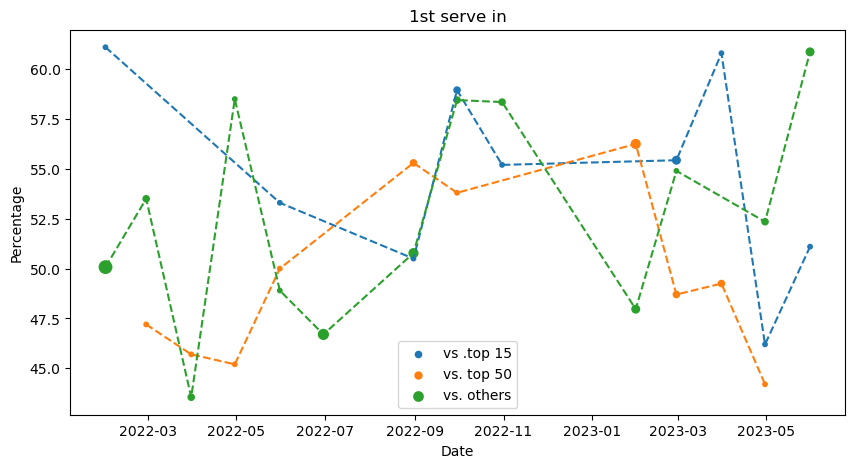

In [44]:
title = '1st serve in'
attributeOfInterest = firstServeIn
plotScatterByGroups(groupedDfArr, attributeOfInterest, labelArr, title)

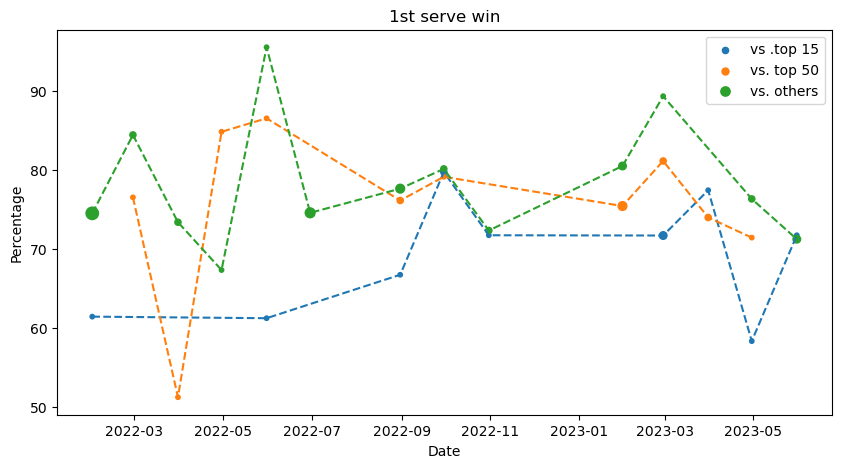

In [45]:
title = '1st serve win'
attributeOfInterest = firstServeWin
plotScatterByGroups(groupedDfArr, attributeOfInterest, labelArr, title)

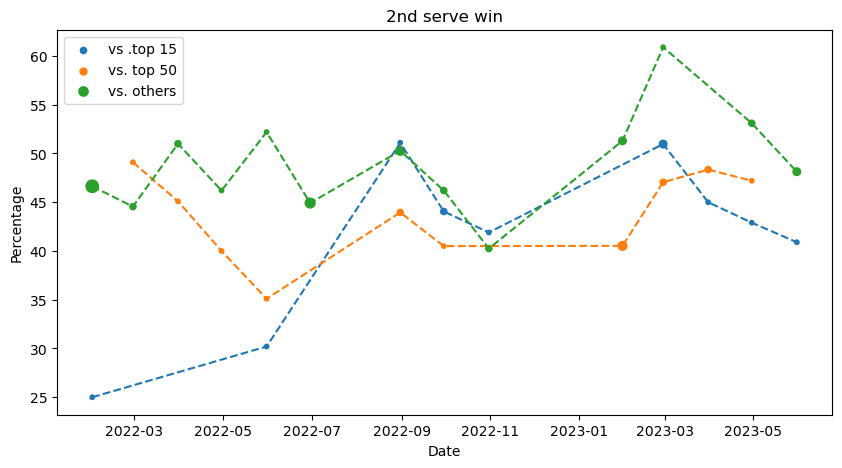

In [49]:
title = '2nd serve win'
attributeOfInterest = secondServeWin
plotScatterByGroups(groupedDfArr, attributeOfInterest, labelArr, title)

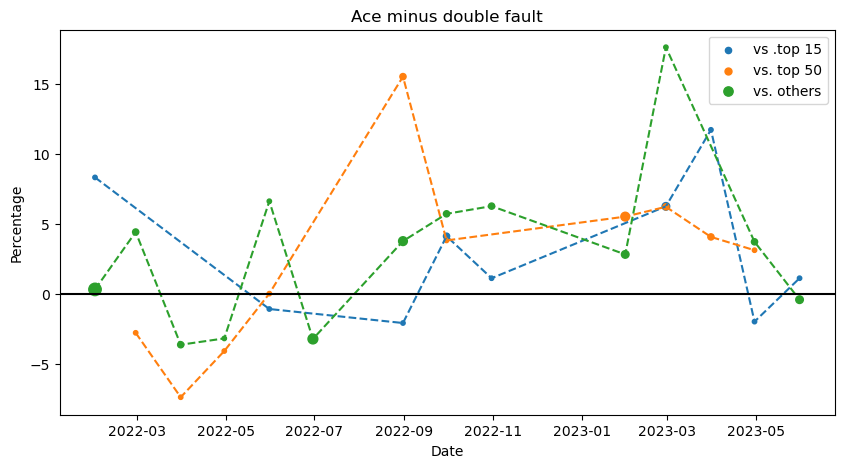

In [47]:
title = 'Ace minus double fault'
attributeOfInterest = serveNetGain
plotScatterByGroups(groupedDfArr, attributeOfInterest, labelArr, title, hline=True)

In [ ]:
attribute = '2nd%'
plt.figure(figsize=(10, 5))  # Optional: Set the figure size

fig, ax = plt.subplots(figsize=(10, 5))  # Optional: Set the figure size

# Create the scatter plots for 'columnA' and 'columnB'
ax.scatter(grouped15[monthObj], grouped15[attribute] * PERC, label='vs. top 15', s=scale * grouped15[sampleSize])
ax.plot(grouped15[monthObj],  grouped15[attribute] * PERC, '--') 
ax.scatter(grouped50[monthObj], grouped50[attribute] * PERC, label='vs. top 50', s=scale * grouped50[sampleSize])
ax.plot(grouped50[monthObj],  grouped50[attribute] * PERC, '--') 
ax.scatter(groupedOthers[monthObj], groupedOthers[attribute] * PERC, label='vs. others', s=scale * groupedOthers[sampleSize])
ax.plot(groupedOthers[monthObj],  groupedOthers[attribute] * PERC, '--') 

#ax.scatter(df['dateObj'], df['1st%'], label='1st serve win')

# Customize y-tick intervals
#ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10))  # Change base to your desired y-tick interval

ax.set_xlabel('Date')  # Label for x-axis
ax.set_ylabel('Percentage')  # Label for y-axis
ax.set_title('2nd serve win')  # Title of the plot

ax.legend()  # Show the legend

plt.show()  # Display the plot

In [ ]:
attribute = 'serveNetGain'

fig, ax = plt.subplots(figsize=(10, 5))  # Optional: Set the figure size

# Create the scatter plots for 'columnA' and 'columnB'
ax.scatter(grouped15[monthObj], grouped15[attribute] * PERC, label='vs. top 15', s=scale * grouped15[sampleSize])
ax.plot(grouped15[monthObj],  grouped15[attribute] * PERC, '--') 
ax.scatter(grouped50[monthObj], grouped50[attribute] * PERC, label='vs. top 50', s=scale * grouped50[sampleSize])
ax.plot(grouped50[monthObj],  grouped50[attribute] * PERC, '--') 
ax.scatter(groupedOthers[monthObj], groupedOthers[attribute] * PERC, label='vs. others', s=scale * groupedOthers[sampleSize])
ax.plot(groupedOthers[monthObj],  groupedOthers[attribute] * PERC, '--') 

# Customize y-tick intervals
#ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10))  # Change base to your desired y-tick interval

ax.set_xlabel('Date')  # Label for x-axis
ax.set_ylabel('Percentage')  # Label for y-axis
ax.set_title('Ace minus Double Fault')  # Title of the plot
ax.axhline(0, color='black')  # Change color as needed
ax.legend()  # Show the legend

plt.show()  # Display the plot

print(f"Ace minus DF > 0: {len(df[df[attributes] > 0])} / {len(df)}")
print(f'vs. top 15 players: {len(top15df[top15df[attributes]>0])} / {len(top15df[attributes])}')
print(f'vs. top 50 players: {len(top50df[top50df[attributes]>0])} / {len(top50df[attributes])}')
print(f'vs. other players: {len(othersDf[othersDf[attributes]>0])} / {len(othersDf[attributes])}')